<hr>
<h1><center>Job Salary Prediction</center></h1>
<hr>

<h1>Import Dependencies</h1>

In [39]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
import string
#Sentiment Analysis 
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


<h1>Load Dataset</h1>
<hr>

In [2]:
#Import dataset 
data = pd.read_csv('datasets/final_dataset.csv') 
data.head()

,Job Title,Publish Date,Closing Date,Position Level,Year Experience,Number of Hiring,Salary,Gender,Age,Term,...,Location 3,Location 4,Location 5,Location 6,Location 7,Duration of Recruiting,Major 1,Major 2,Major 3,Major 4
0,Unity Game Developer,"Thursday, September 8, 2022","Saturday, October 8, 2022",Medium Skill,2.0,1,1383,Male/Female,Age Unlimited,Full-Time,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
1,Sales Engineer -Dynamic Technology,"Monday, September 5, 2022","Wednesday, October 5, 2022",Medium Skill,2.0,1,578,Male/Female,Age Unlimited,Full-Time,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
2,Senior Product Development Officer (1post),"Thursday, September 8, 2022","Saturday, October 8, 2022",Medium Skill,2.0,1,728,Male/Female,Age Unlimited,Full-Time,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
3,"Senior Auditor, IT Audit","Thursday, August 18, 2022","Saturday, September 17, 2022",Medium Skill,2.0,1,1468,Male/Female,Age Unlimited,Full-Time,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
4,Solution Architect,"Monday, August 15, 2022","Wednesday, September 14, 2022",Medium Skill,2.0,1,821,Male/Female,Age Unlimited,Full-Time,...,NaN,NaN,NaN,NaN,NaN,30,Information Technology,Computer Science,NaN,NaN


<h1>Data Validation & Cleansing</h1>
<hr>

In [3]:
#Check the data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job Title               328 non-null    object 
 1   Publish Date            328 non-null    object 
 2   Closing Date            328 non-null    object 
 3   Position Level          298 non-null    object 
 4   Year Experience         270 non-null    float64
 5   Number of Hiring        328 non-null    int64  
 6   Salary                  328 non-null    int64  
 7   Gender                  328 non-null    object 
 8   Age                     328 non-null    object 
 9   Term                    328 non-null    object 
 10  Job Category            328 non-null    object 
 11  Industry                328 non-null    object 
 12  Education Level         312 non-null    object 
 13  Language 1              276 non-null    object 
 14  Langue level 1          276 non-null    ob

In [4]:
#sum the dataset is null 
data.isnull().sum()

Job Title                   0
Publish Date                0
Closing Date                0
Position Level             30
Year Experience            58
Number of Hiring            0
Salary                      0
Gender                      0
Age                         0
Term                        0
Job Category                0
Industry                    0
Education Level            16
Language 1                 52
Langue level 1             52
Langue 2                  307
Language level 2          307
Language 3                322
Language level 3          322
Location 1                  0
Location 2                321
Location 3                326
Location 4                326
Location 5                326
Location 6                328
Location 7                328
Duration of Recruiting      0
Major 1                     0
Major 2                   249
Major 3                   324
Major 4                   326
dtype: int64

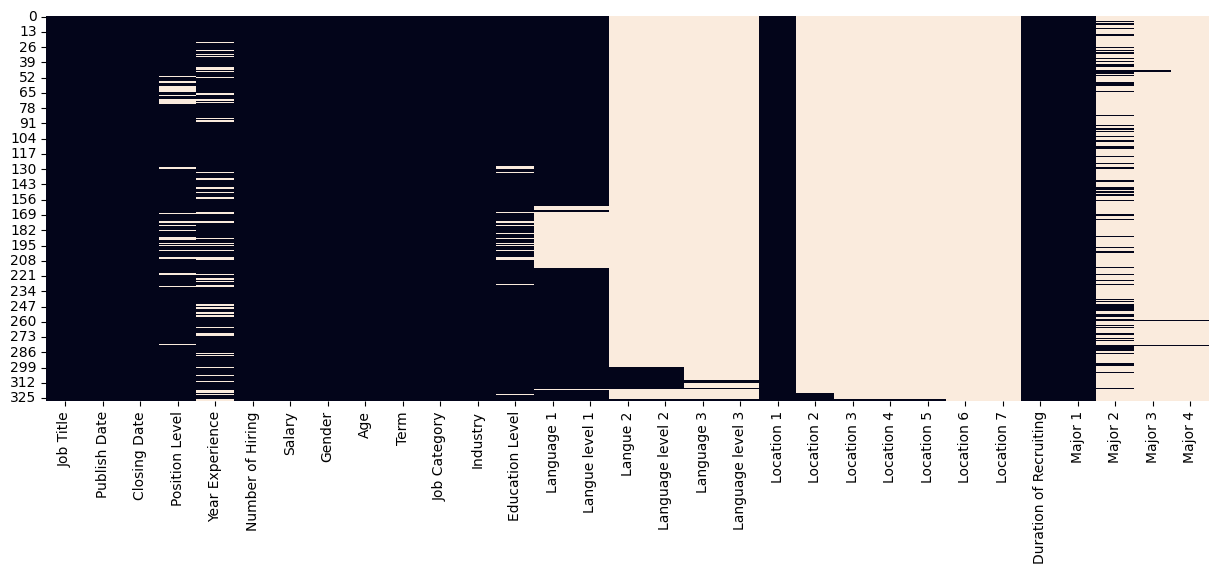

In [5]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks()
plt.show()

In [6]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


In [7]:
#drop the features are not mostly helpful
data.drop_duplicates(inplace=True)
check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


In [8]:
data.shape

(328, 31)

In [9]:
#define a variable and copy dataset
df_sent = data.copy()

In [10]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [11]:
#check df 
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job Title               328 non-null    object 
 1   Publish Date            328 non-null    object 
 2   Closing Date            328 non-null    object 
 3   Position Level          298 non-null    object 
 4   Year Experience         270 non-null    float64
 5   Number of Hiring        328 non-null    int64  
 6   Salary                  328 non-null    int64  
 7   Gender                  328 non-null    object 
 8   Age                     328 non-null    object 
 9   Term                    328 non-null    object 
 10  Job Category            328 non-null    object 
 11  Industry                328 non-null    object 
 12  Education Level         312 non-null    object 
 13  Language 1              276 non-null    object 
 14  Langue level 1          276 non-null    ob

In [12]:
print("**"*50)
print("Total Number of Tech Job Hiring: ", df_sent.shape[0])
print("Total Number of Job Hiring: ", df_sent['Number of Hiring'].sum())
print("Total Number of Tech Job Category: ", len(df_sent['Job Category'].value_counts()))
print("Total Number of Tech Industry: ", len(df_sent['Industry'].value_counts()))
print("**"*50)

print("MAX number of hiring : ", df_sent['Number of Hiring'].max())
print("MIN number of hiring : ", df_sent['Number of Hiring'].min())

# print("MAX number of hiring : ", df_sent['Salary Range (Max)'].max())
# print("MIN number of hiring : ", df_sent['Salary Range (Min)'].min())

print("MAX number of experience : ", df_sent['Year Experience'].max())
print("MIN number of experience : ", df_sent['Year Experience'].min())

print("MAX number of Duration of Recruiting : ", df_sent['Duration of Recruiting'].max())
print("MIN number of Duration of Recruiting : ", df_sent['Duration of Recruiting'].min())

****************************************************************************************************
Total Number of Tech Job Hiring:  328
Total Number of Job Hiring:  593
Total Number of Tech Job Category:  27
Total Number of Tech Industry:  25
****************************************************************************************************
MAX number of hiring :  10
MIN number of hiring :  1
MAX number of experience :  7.0
MIN number of experience :  1.0
MAX number of Duration of Recruiting :  30
MIN number of Duration of Recruiting :  7


<h1>Feature Engineering</h1>
<hr>

In [53]:
# selected the important features 
data = df_sent[[
    'Position Level',
    'Year Experience',
    'Number of Hiring',
    'Salary',
    'Gender',
    'Age',
    'Term',
    'Job Category',
    'Industry',
    'Education Level',
    'Language 1',
    'Langue level 1',
    'Location 1',
    'Duration of Recruiting',
    'Major 1'
]]

In [54]:
#rename the features 
data.rename(columns={
    'Position Level':'position_level',
    'Year Experience':'year_experience',
    'Number of Hiring':'num_hiring',
    'Salary':'salary',
    'Gender':'gender',
    'Age':'age_range',
    'Term':'term',
    'Job Category':'job_category',
    'Industry':'industry',
    'Education Level':'education_level',
    'Language 1':'first_language',
    'Langue level 1':'first_language_level',
    'Location 1':'location',
    'Duration of Recruiting':'recruit_duration',
    'Major 1':'major'
},inplace=True)

<h1>Data Preprocessing</h1>
<hr>

In [55]:
#check the health info of the datast 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position_level        298 non-null    object 
 1   year_experience       270 non-null    float64
 2   num_hiring            328 non-null    int64  
 3   salary                328 non-null    int64  
 4   gender                328 non-null    object 
 5   age_range             328 non-null    object 
 6   term                  328 non-null    object 
 7   job_category          328 non-null    object 
 8   industry              328 non-null    object 
 9   education_level       312 non-null    object 
 10  first_language        276 non-null    object 
 11  first_language_level  276 non-null    object 
 12  location              328 non-null    object 
 13  recruit_duration      328 non-null    int64  
 14  major                 328 non-null    object 
dtypes: float64(1), int64(3)

In [56]:
#check if the dataset is have the none values 
data.isnull().sum()

position_level          30
year_experience         58
num_hiring               0
salary                   0
gender                   0
age_range                0
term                     0
job_category             0
industry                 0
education_level         16
first_language          52
first_language_level    52
location                 0
recruit_duration         0
major                    0
dtype: int64

In [57]:
#Clean the none value from the dataset 

data.year_experience = data.year_experience.fillna(1)
data.education_level = data.education_level.fillna("Graduated")
data.first_language = data.first_language.fillna("Khmer")
data.first_language_level = data.first_language_level.fillna("Mother Tongue")


In [58]:
#first step to clean the right data type 

data.position_level = data.position_level.astype(str)
data.year_experience = data.year_experience.astype(int)
data.num_hiring = data.num_hiring.astype(int)
data.salary = data.salary.astype(int)
data.gender = data.gender.astype(str)
data.age_range = data.age_range.astype(str)
data.term = data.term.astype(str)
data.job_category = data.job_category.astype(str)
data.education_level = data.education_level.astype(str)
data.first_language = data.first_language.astype(str)
data.first_language_level = data.first_language_level.astype(str)
data.location = data.location.astype(str)
data.recruit_duration = data.recruit_duration.astype(int)
data.major = data.major.astype(str)

In [59]:
# Apply the label encoding for the categorical variable 
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to apply label encoding and store the mapping
def apply_label_encoding_transform(data, list_columns):
    label_encoders = {}
    for column in list_columns:
        label_encoder = LabelEncoder()  # Initialize a new LabelEncoder for each column
        data[column] = label_encoder.fit_transform(data[column])
        label_encoders[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    return data, label_encoders

# Function to get categorical columns
def get_categorical_columns(data):
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns

# Get the list of categorical variables
list_categorical_var = get_categorical_columns(data)
print("List of categorical variables:\n", list_categorical_var)

# Apply the label encoding
data, label_encoders = apply_label_encoding_transform(data, list_categorical_var)

# Display the transformed DataFrame
data.info()

# Display the mappings for each column
for column, mapping in label_encoders.items():
    print(f"\nMapping for {column}:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} -> {encoded_value}")


List of categorical variables:
 ['position_level', 'gender', 'age_range', 'term', 'job_category', 'industry', 'education_level', 'first_language', 'first_language_level', 'location', 'major']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   position_level        328 non-null    int32
 1   year_experience       328 non-null    int32
 2   num_hiring            328 non-null    int32
 3   salary                328 non-null    int32
 4   gender                328 non-null    int32
 5   age_range             328 non-null    int32
 6   term                  328 non-null    int32
 7   job_category          328 non-null    int32
 8   industry              328 non-null    int32
 9   education_level       328 non-null    int32
 10  first_language        328 non-null    int32
 11  first_language_level  328 non-null    int32
 12  location    

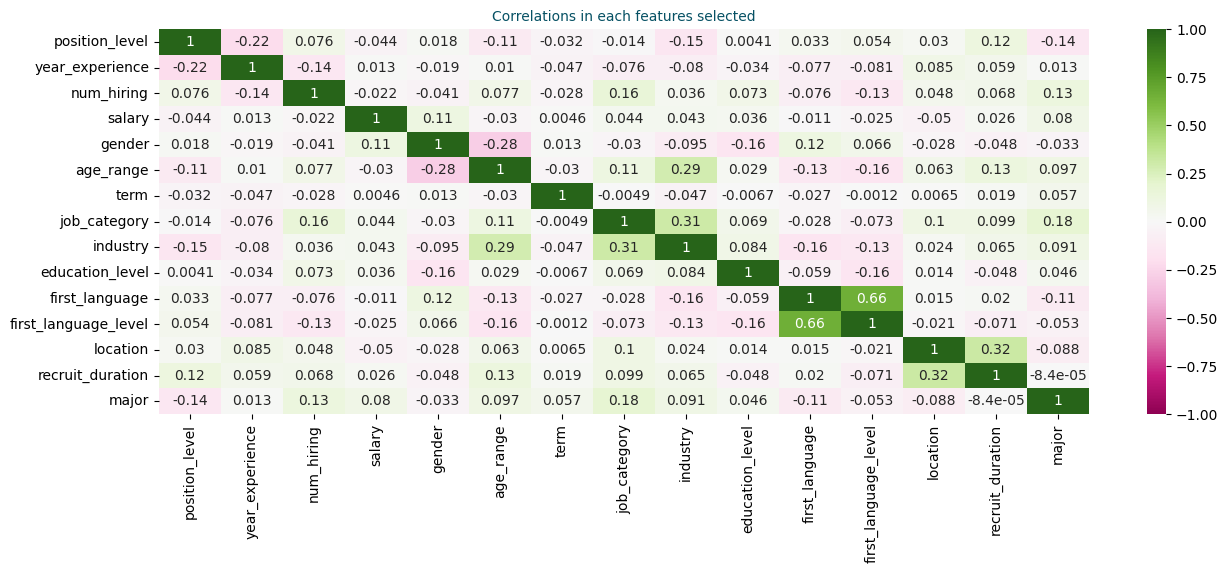

In [63]:
# compute correlation coefficent between variables
pearson_correlation = data.corr(method='pearson')
plt.subplots(figsize=(15,5))
sns.heatmap(pearson_correlation, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlations in each features selected', fontsize='10', color='#065164')
plt.show()

<h1>Model Training</h1>
<hr>

In [68]:
#Define X,y for train_test_split
X = data.drop(['salary'], axis=1)
y = data['salary']

#Apply train_test_split funtion to random dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("++"*50)
print("X Train Shape: ", X_train.shape)
print("X Test Shape: ", X_test.shape)
print("y Train Shape: ", y_train.shape)
print("y Test Shape: ", y_test.shape)
print("++"*50)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
X Train Shape:  (262, 14)
X Test Shape:  (66, 14)
y Train Shape:  (262,)
y Test Shape:  (66,)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def linear_regression_gridsearch(X_train, y_train, X_test, y_test, params=None):
    """
    Perform linear regression with grid search.

    Parameters:
    - X_train: Training features (numpy array or pandas DataFrame)
    - y_train: Training labels (numpy array or pandas Series)
    - X_test: Test features (numpy array or pandas DataFrame)
    - y_test: Test labels (numpy array or pandas Series)
    - params: Parameters for GridSearchCV (dict), default is None

    Returns:
    - best_model: Best fitted linear regression model
    - best_params: Best parameters found by GridSearchCV (empty dict)
    - test_rmse: Root mean squared error on the test set
    """

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Set up parameters for grid search if provided
    if params is None:
        params = {}  # No parameters to tune for LinearRegression

    # Perform grid search with cross-validation to find the best model
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Since LinearRegression has no tunable parameters, return an empty dict for best_params
    best_params = {}

    return best_model, best_params, test_rmse, best_model



def linear_regression(X_train, y_train, X_test, y_test):
    """
    Perform linear regression without grid search.

    Parameters:
    - X_train: Training features (numpy array or pandas DataFrame)
    - y_train: Training labels (numpy array or pandas Series)
    - X_test: Test features (numpy array or pandas DataFrame)
    - y_test: Test labels (numpy array or pandas Series)

    Returns:
    - model: Fitted linear regression model
    - test_rmse: Root mean squared error on the test set
    """

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE on the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return model, test_rmse


In [105]:
params = {
    'fit_intercept': [True],
    'copy_X': [True],
    'n_jobs': [-1]  # Use all processors
}

best_model, best_params, test_rmse, gridsearch_model = linear_regression_gridsearch(X_train, y_train, X_test, y_test, params=params)

# Since LinearRegression has no tunable parameters, return an empty dict for best_params
print("Best Parameters:", best_params) 
print("Test RMSE:", test_rmse)
print("Model coefficients:", gridsearch_model.coef_)  

Best Parameters: {}
Test RMSE: 276.28167163081315
Model coefficients: [ -31.69482819   -0.77969701   -5.45719047   97.14581939    9.24435762
    3.05540623    3.49449582    0.57029588   72.41197523  -20.55414779
    0.92647359 -143.36686231    4.46346224    3.70428642]


In [106]:
lr_model, test_rmse = linear_regression(X_train, y_train, X_test, y_test)

# Print test RMSE and model parameters if needed
print("Test RMSE:", test_rmse)
print("Model coefficients:", lr_model.coef_)  

Test RMSE: 276.28167163081315
Model coefficients: [ -31.69482819   -0.77969701   -5.45719047   97.14581939    9.24435762
    3.05540623    3.49449582    0.57029588   72.41197523  -20.55414779
    0.92647359 -143.36686231    4.46346224    3.70428642]


<h1>Model Evaluation</h1>
<hr>

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_linear_regression(y_true, y_pred, X):
    """
    Evaluate the performance of a linear regression model.

    Parameters:
    - y_true: True labels (numpy array or pandas Series)
    - y_pred: Predicted labels (numpy array or pandas Series)
    - X: Features (numpy array or pandas DataFrame) used to calculate adjusted R-squared

    Returns:
    - metrics: Dictionary containing evaluation metrics (MAE, MSE, RMSE, R-squared, Adjusted R-squared)
    """
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R²) score
    r2 = r2_score(y_true, y_pred)

    # Adjusted R-squared score
    # Adjusted R² = 1 - (1 - R²) * (n - 1) / (n - p - 1)
    n = X.shape[0]  # number of samples
    p = X.shape[1] if isinstance(X, np.ndarray) else X.shape[1]  # number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'Adjusted R-squared': adj_r2
    }

    return metrics

y_pred = gridsearch_model.predict(X_test)
metrics = evaluate_linear_regression(y_test, y_pred, X)

# Print evaluation metrics
for metric, value in metrics.items():
    print("++"*50)
    print(f"{metric}: {value}")
    print("++"*50)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MAE: 239.32279694797498
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MSE: 76331.56207911647
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RMSE: 276.28167163081315
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R-squared: -0.14536073981157327
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [107]:
y_pred = lr_model.predict(X_test)
metrics = evaluate_linear_regression(y_test, y_pred, X)

# Print evaluation metrics
for metric, value in metrics.items():
    print("++"*50)
    print(f"{metric}: {value}")
    print("++"*50)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MAE: 239.32279694797498
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MSE: 76331.56207911647
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RMSE: 276.28167163081315
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R-squared: -0.14536073981157327
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [96]:
data.head()

,position_level,year_experience,num_hiring,salary,gender,age_range,term,job_category,industry,education_level,first_language,first_language_level,location,recruit_duration,major
0,2,2,1,1383,2,0,0,12,13,0,0,2,2,30,0
1,2,2,1,578,2,0,0,23,23,0,0,2,2,30,0
2,2,2,1,728,2,0,0,12,4,0,0,2,2,30,0
3,2,2,1,1468,2,0,0,4,4,0,0,2,2,30,0
4,2,2,1,821,2,0,0,12,4,0,0,2,2,30,5


In [99]:
values = [2, 2, 1, 2, 0, 0, 23, 23, 0, 0, 2, 2, 30, 0]
input_data = np.array(values).reshape(1, -1) 
prediction = model.predict(input_data)

print(prediction)

[1017.22371227]
